* This notebook was made to look at the statistics of wind information by plotting wind rose diagram

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pylab
import matplotlib.cm as cm
import numpy as np
from math import pi
import wind
import datetime, os
import netCDF4 as nc
from windrose import WindroseAxes
from salishsea_tools import (
    nc_tools,
    viz_tools,
    stormtools,
    tidetools,
)
import pandas as pd

In [2]:
OP = nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d01.nc')
OPlon =OP.variables['nav_lon'][:]-360
OPlat = OP.variables['nav_lat'][:]

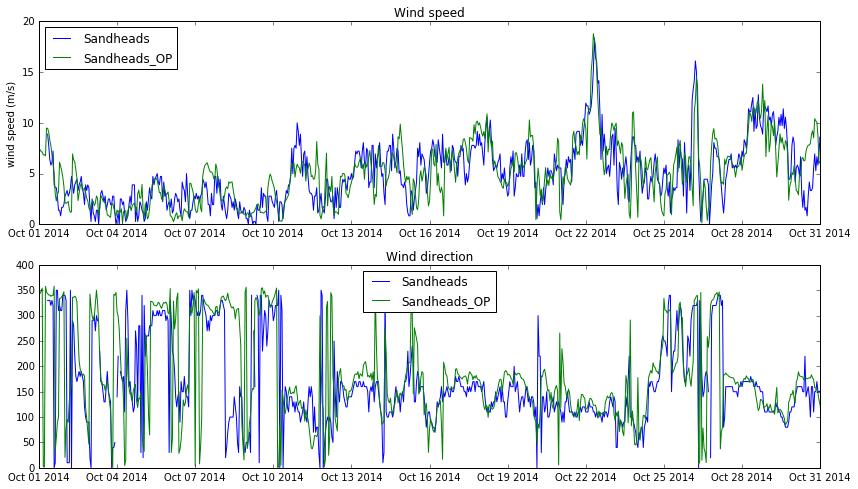

In [3]:
import glob
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-Oct-2014'; end = '31-Oct-2014';
start2 = '31-Oct-2014'; end2 = '31-Oct-2014';
endd = '31-Oct-2014';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

ax =wind.compare_winds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

In [4]:
## check some other stations, since cross strait wind lack spatial coherence.
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]

modOP = 'west';
lon = {};lat = {}
[j,i]=wind.find_model_point(X[416,255],Y[416,255],OPlon,OPlat)
lon[modOP] = OPlon[j,i]
lat[modOP]=OPlat[j,i]

In [5]:
wind_speed = {}; wind_dir = {}; time = {}; lat={}; lon={}; press={}; temp={}; therm={};
solar={}; precip={}; qair={}
[wind_speed[modOP],wind_dir[modOP],time[modOP],
         press[modOP],temp[modOP],solar[modOP],
         therm[modOP],qair[modOP],precip[modOP]] = wind.compile_OP(filesOP,j,i)    

In [6]:
## convert direction 
wind_dir_correct = []
for dire in wind_dir['west']:
    dire_corre = 450 - dire
    wind_dir_correct.append(dire_corre)

In [7]:
df_west = pd.DataFrame({"speed": wind_speed['west'], "direction": wind_dir_correct})

* Note these windroses represent wind direction going to, not coming from

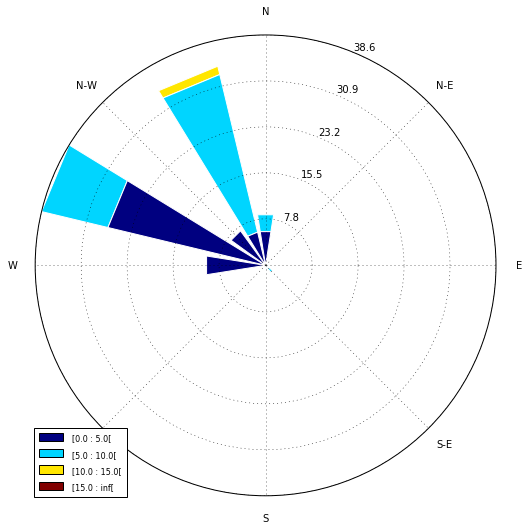

In [8]:
## moderate wind at west station
ax = WindroseAxes.from_ax()
ax.bar(df_west.direction[408:480], df_west.speed[408:480], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

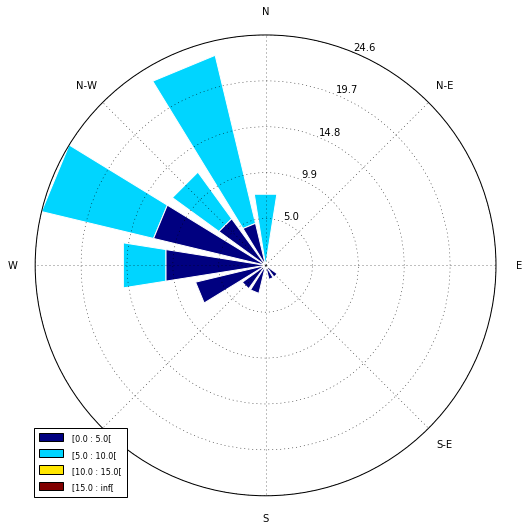

In [9]:
## moderate wind: oct 13~15 at west station
ax = WindroseAxes.from_ax()
ax.bar(df_west.direction[288:359], df_west.speed[288:359], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

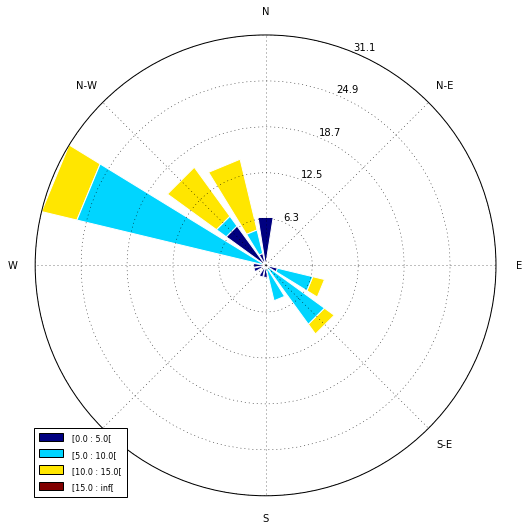

In [10]:
## strong wind: 600-671 at west station
ax = WindroseAxes.from_ax()
ax.bar(df_west.direction[600:671], df_west.speed[600:671], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

# Sandheads during Oct 2014

In [11]:
import glob
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-Oct-2014'; end = '31-Oct-2014';
start2 = '31-Oct-2014'; end2 = '31-Oct-2014';
endd = '31-Oct-2014';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

wind_speed,wind_dir =wind.get_OPwinds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

In [12]:
## convert direction 
wind_dir_correct = []
for dire in wind_dir['Sandheads_OP']:
    dire_corre = 450 - dire
    wind_dir_correct.append(dire_corre)

In [13]:
df = pd.DataFrame({"speed": wind_speed['Sandheads_OP'], "direction": wind_dir_correct})

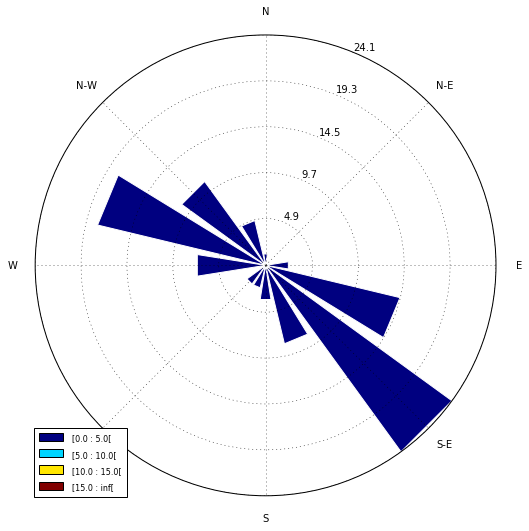

In [14]:
## weak wind
ax = WindroseAxes.from_ax()
ax.bar(df.direction[48:144], df.speed[48:144], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

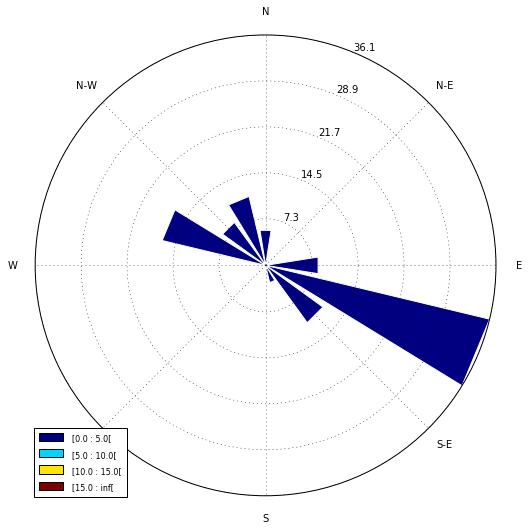

In [15]:
## weak wind: Oct 7~ Oct 9, 15 am.
ax = WindroseAxes.from_ax()
ax.bar(df.direction[192:233], df.speed[192:233], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

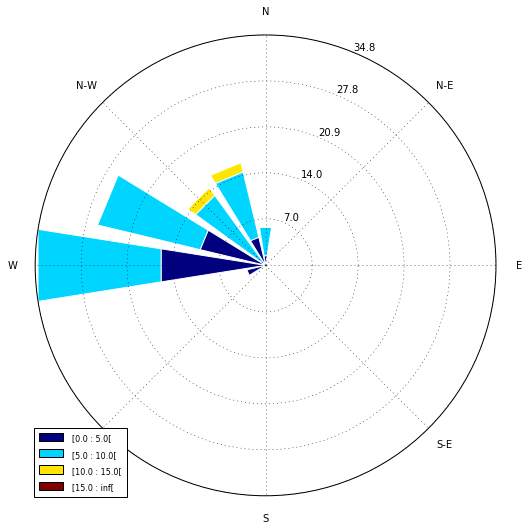

In [16]:
## moderate wind
ax = WindroseAxes.from_ax()
ax.bar(df.direction[408:480], df.speed[408:480], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

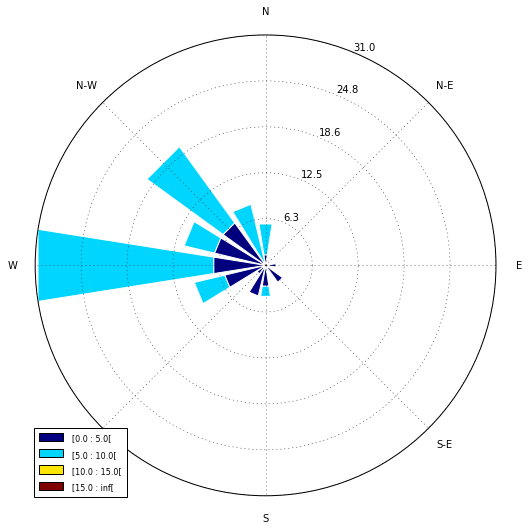

In [17]:
## moderate wind: oct 13~15
ax = WindroseAxes.from_ax()
ax.bar(df.direction[288:359], df.speed[288:359], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

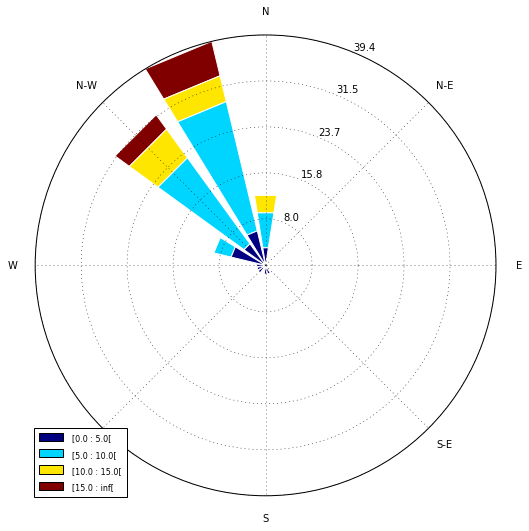

In [18]:
## strong wind
ax = WindroseAxes.from_ax()
ax.bar(df.direction[480:551], df.speed[480:551], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

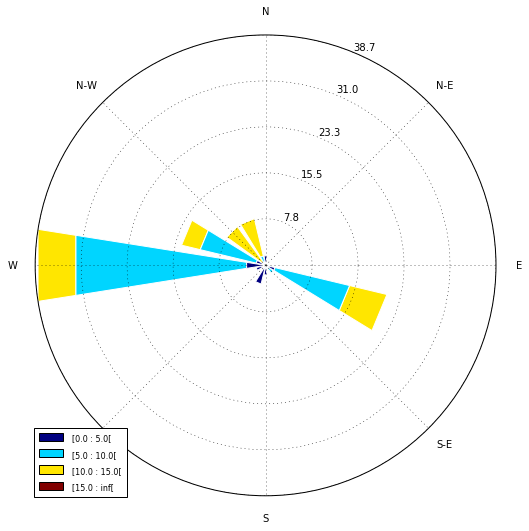

In [19]:
## strong wind: 600-671
ax = WindroseAxes.from_ax()
ax.bar(df.direction[600:671], df.speed[600:671], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

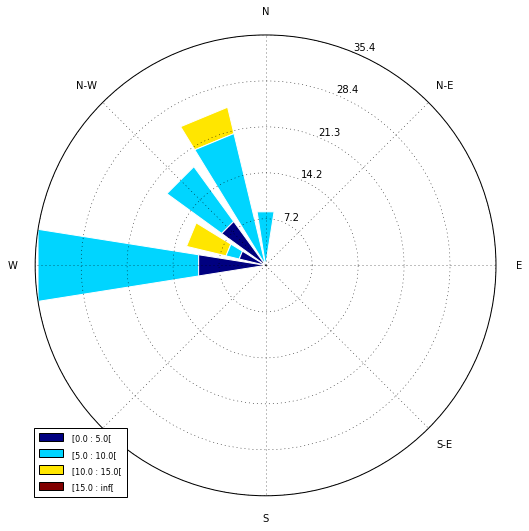

In [20]:
## strong wind: oct 28~30
ax = WindroseAxes.from_ax()
ax.bar(df.direction[671:719], df.speed[671:719], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

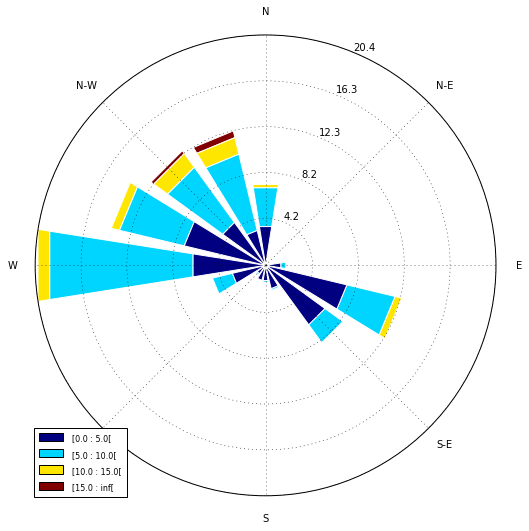

In [21]:
## total wind during the month
ax = WindroseAxes.from_ax()
ax.bar(df.direction, df.speed, bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [22]:
#pylab.savefig('windrose')

# Sandheads May 2015

In [23]:
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m05d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-May-2015'; end = '31-May-2015';
start2 = '31-May-2015'; end2 = '31-May-2015';
endd = '31-May-2015';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

wind_speed,wind_dir =wind.get_OPwinds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

In [24]:
## convert direction 
wind_dir_correct = []
for dire in wind_dir['Sandheads_OP']:
    dire_corre = 450 - dire
    wind_dir_correct.append(dire_corre)
df_may = pd.DataFrame({"speed": wind_speed['Sandheads_OP'], "direction": wind_dir_correct})

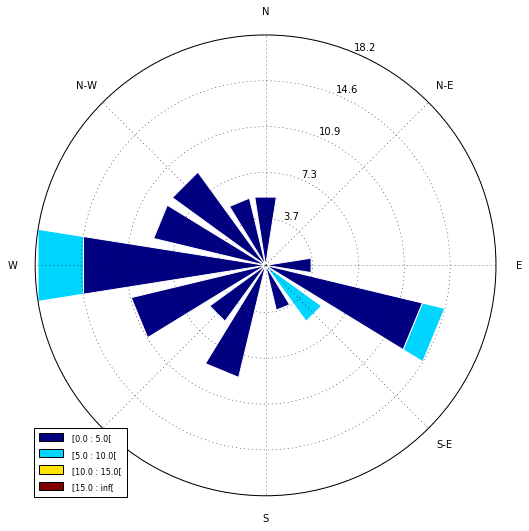

In [25]:
## weak wind: may 9~11, late spring in the conversion to neap
ax = WindroseAxes.from_ax()
ax.bar(df_may.direction[192:263], df_may.speed[192:263], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

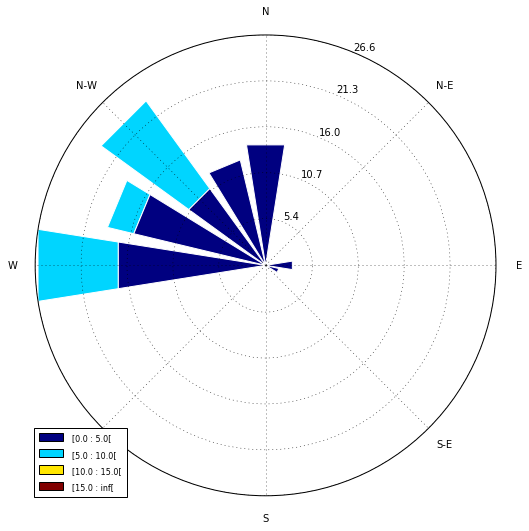

In [26]:
## moderate wind: may 13~15, neap tides
ax = WindroseAxes.from_ax()
ax.bar(df_may.direction[288:359], df_may.speed[288:359], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

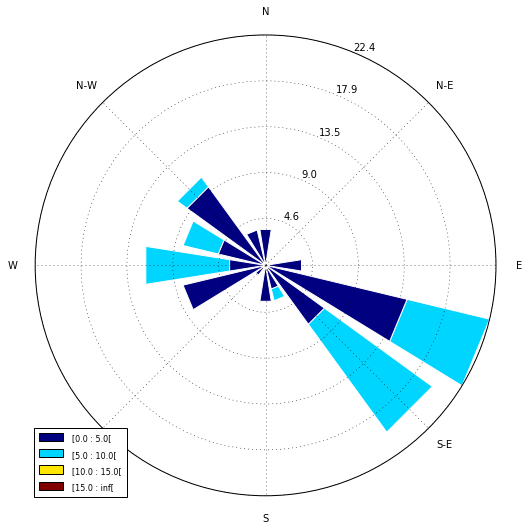

In [27]:
## moderate wind: may 16~19, spring tides
ax = WindroseAxes.from_ax()
ax.bar(df_may.direction[360:455], df_may.speed[360:455], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

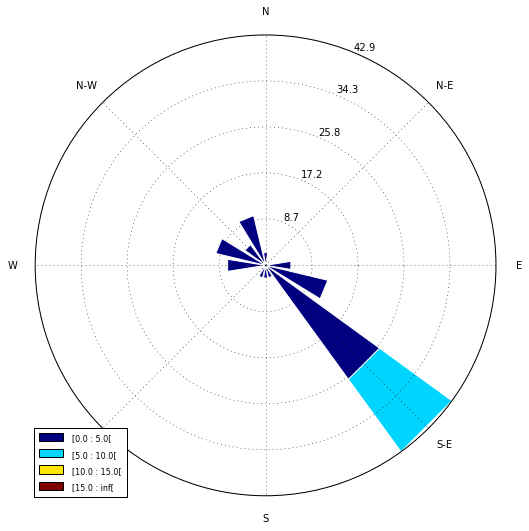

In [28]:
## moderate wind: may 28~29, neap tides
ax = WindroseAxes.from_ax()
ax.bar(df_may.direction[648:695], df_may.speed[648:695], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

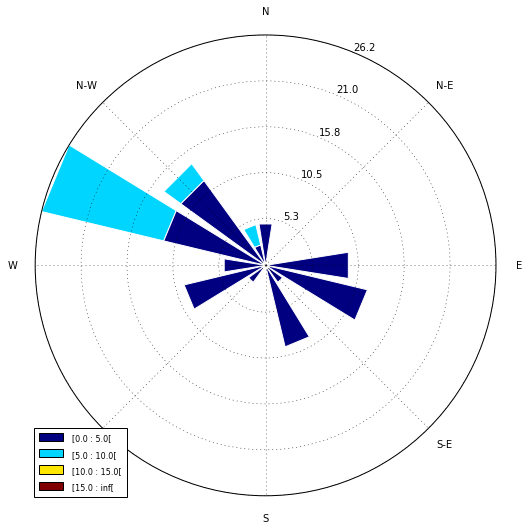

In [29]:
## moderate wind: may 4~6, spring tides
ax = WindroseAxes.from_ax()
ax.bar(df_may.direction[72:143], df_may.speed[72:143], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

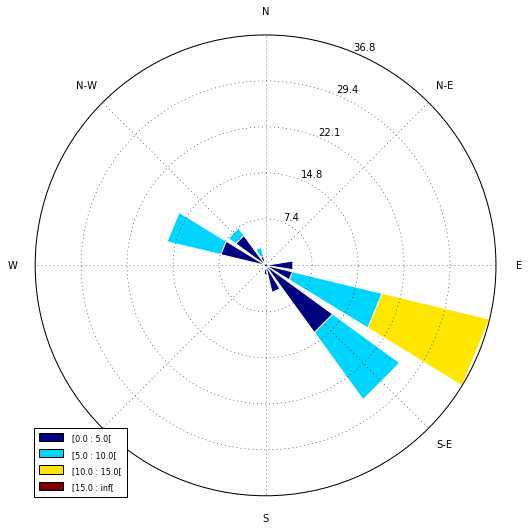

In [30]:
## strong wind: may 2~4, early spring
ax = WindroseAxes.from_ax()
ax.bar(df_may.direction[24:95], df_may.speed[24:95], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

# Sandheads Jan 2016

In [31]:
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2016m01d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-Jan-2016'; end = '31-Jan-2016';
start2 = '31-Jan-2016'; end2 = '31-Jan-2016';
endd = '31-Jan-2016';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

wind_speed,wind_dir =wind.get_OPwinds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

In [32]:
## convert direction 
wind_dir_correct = []
for dire in wind_dir['Sandheads_OP']:
    dire_corre = 450 - dire
    wind_dir_correct.append(dire_corre)
df_jan = pd.DataFrame({"speed": wind_speed['Sandheads_OP'], "direction": wind_dir_correct})

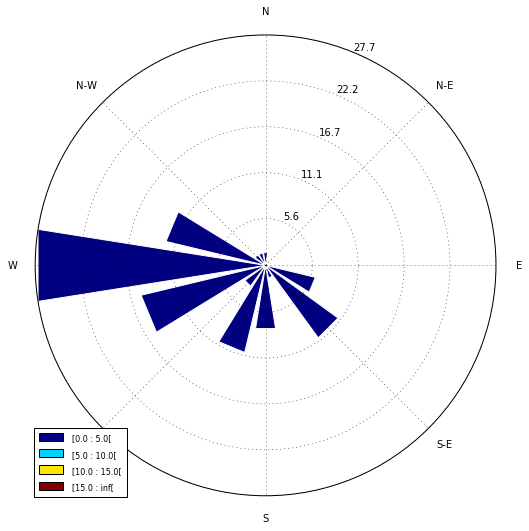

In [33]:
## weak wind, jan 8~10, late neap early spring
ax = WindroseAxes.from_ax()
ax.bar(df_jan.direction[168:239], df_jan.speed[168:239], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

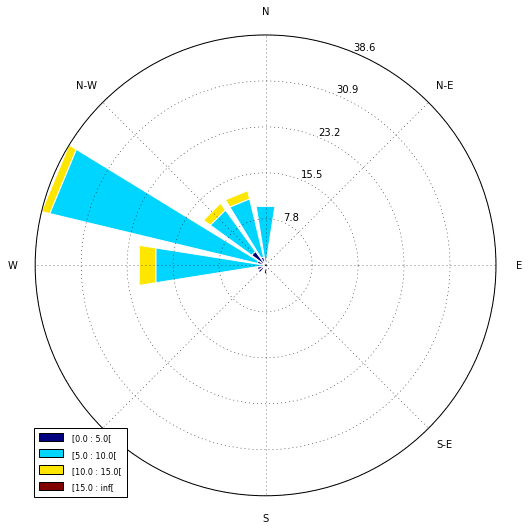

In [34]:
## moderate wind: jan 17~19, late neap early spring
ax = WindroseAxes.from_ax()
ax.bar(df_jan.direction[384:455], df_jan.speed[384:455], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

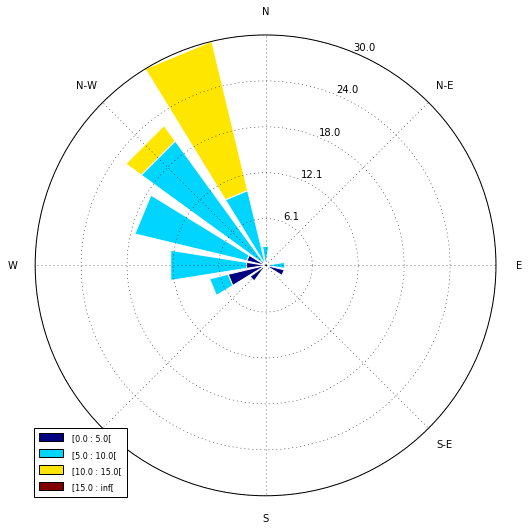

In [35]:
## strong wind: jan 21~23, spring tides
ax = WindroseAxes.from_ax()
ax.bar(df_jan.direction[624:671], df_jan.speed[624:671], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()